In [1]:
import numpy as np
import cv2
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy as scc
from sklearn.model_selection import train_test_split
import glob
import pathlib
from keras.applications.vgg16 import VGG16

In [2]:
pic_path=pathlib.Path(r"C:\Users\arunf\Data Science\Vehicles datatset\train1")

In [3]:
bicycle=list(pic_path.glob('bicycle\*'))
bus=list(pic_path.glob('bus\*'))
car=list(pic_path.glob('car\*'))
motorcycle=list(pic_path.glob('motorcycle\*'))
pickup_truck=list(pic_path.glob('pickup_truck\*'))
single_unit_truck=list(pic_path.glob('single_unit_truck\*'))        

In [4]:
pic_dict={'bicycle':bicycle,'bus':bus,'car':car,'motorcycle':motorcycle,'pickup_truck':pickup_truck,
          'single_unit_truck':single_unit_truck}

In [5]:
pic_class={'bicycle':0,'bus':1,'car':2,'motorcycle':3,'pickup_truck':4,
          'single_unit_truck':5}

In [6]:
x=[]
y=[]

In [7]:
for i in pic_dict:
    pic_path_list=pic_dict[i]
    for path in pic_path_list:
        img=cv2.imread(str(path))
        img=cv2.resize(img,(100,100))
        img=img/255
        x.append(img)
        y.append(pic_class[i])

In [8]:
x=np.array(x)
y=np.array(y)

In [9]:
print(x.shape)
print(y.shape)

(27046, 100, 100, 3)
(27046,)


In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
from tensorflow.keras import layers
data_augmentation=keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(100,100,3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        
    ])

In [12]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(100,100,3)
)

In [13]:
model=Sequential()
model.add(data_augmentation)
model.add(conv_base)

# model.add(Conv2D(filters=180,kernel_size=(3,3,),input_shape=(100,100,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=150,kernel_size=(3,3,),input_shape=(100,100,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=120,kernel_size=(3,3,),input_shape=(100,100,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=75,kernel_size=(3,3,),input_shape=(100,100,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 180)               829620    
                                                                 
 dense_1 (Dense)             (None, 150)               27150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 80)               

In [14]:
conv_base.trainable = False

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 180)               829620    
                                                                 
 dense_1 (Dense)             (None, 150)               27150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 80)               

In [16]:
model.compile(optimizer='adam',loss=scc(),metrics=['accuracy'])

In [17]:
import tensorflow
callback = tensorflow.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [18]:
hist=model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest),callbacks=[callback])

Epoch 1/10
592/592 [==============================] - 468s 778ms/step - loss: 0.7026 - accuracy: 0.7153 - val_loss: 0.4378 - val_accuracy: 0.8257
Epoch 2/10
592/592 [==============================] - 445s 753ms/step - loss: 0.4766 - accuracy: 0.8164 - val_loss: 0.4436 - val_accuracy: 0.8392
Epoch 3/10
592/592 [==============================] - 420s 710ms/step - loss: 0.4159 - accuracy: 0.8445 - val_loss: 0.3440 - val_accuracy: 0.8740
Epoch 4/10
592/592 [==============================] - 408s 690ms/step - loss: 0.3775 - accuracy: 0.8555 - val_loss: 0.3517 - val_accuracy: 0.8694
Epoch 5/10
592/592 [==============================] - 390s 659ms/step - loss: 0.3490 - accuracy: 0.8670 - val_loss: 0.3815 - val_accuracy: 0.8667
Epoch 6/10
592/592 [==============================] - 389s 658ms/step - loss: 0.3274 - accuracy: 0.8753 - val_loss: 0.3127 - val_accuracy: 0.8824
Epoch 7/10
592/592 [==============================] - 390s 658ms/step - loss: 0.2983 - accuracy: 0.8890 - val_loss: 0.3366 -

In [19]:
model.evaluate(xtest,ytest)

254/254 [==============================] - 112s 441ms/step - loss: 0.3127 - accuracy: 0.8824


[0.3126939833164215, 0.8824254274368286]

In [20]:
his=hist.history
his

{'loss': [0.7025771141052246,
  0.4765516221523285,
  0.4158537983894348,
  0.37753066420555115,
  0.3489515781402588,
  0.32742196321487427,
  0.2983321249485016,
  0.2825358808040619,
  0.26346492767333984,
  0.25772345066070557],
 'accuracy': [0.7152968645095825,
  0.8163955211639404,
  0.8444960713386536,
  0.855535626411438,
  0.8669976592063904,
  0.8753433227539062,
  0.8889710307121277,
  0.894305944442749,
  0.9008557200431824,
  0.9029685258865356],
 'val_loss': [0.4377872049808502,
  0.4436134099960327,
  0.34402430057525635,
  0.3516572117805481,
  0.3814511001110077,
  0.3126939833164215,
  0.33664634823799133,
  0.4453471899032593,
  0.33724096417427063,
  0.3183780312538147],
 'val_accuracy': [0.8257333040237427,
  0.8391668796539307,
  0.8740448355674744,
  0.8693615794181824,
  0.8666502237319946,
  0.8824254274368286,
  0.8772491812705994,
  0.8384274244308472,
  0.8807000517845154,
  0.8927779197692871]}

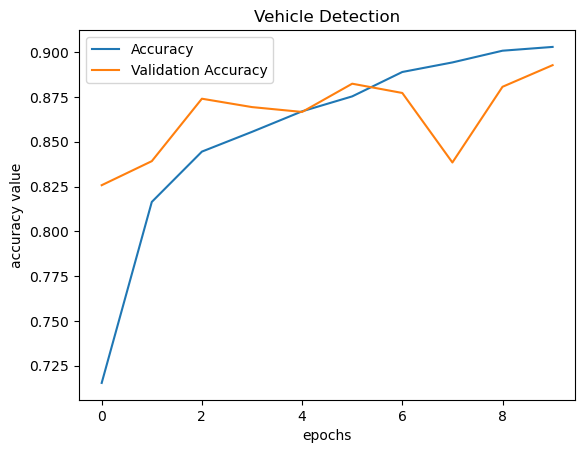

In [21]:
plt.plot(his['accuracy'],label='Accuracy')
plt.plot(his['val_accuracy'],label='Validation Accuracy')
plt.title("Vehicle Detection")
plt.xlabel('epochs')
plt.ylabel('accuracy value')
plt.legend()
plt.show()

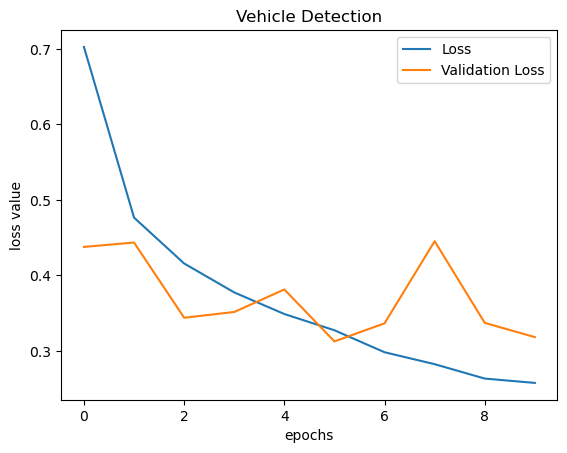

In [22]:
plt.plot(his['loss'],label='Loss')
plt.plot(his['val_loss'],label='Validation Loss')
plt.title("Vehicle Detection")
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()
plt.show()

**PREDICTION**

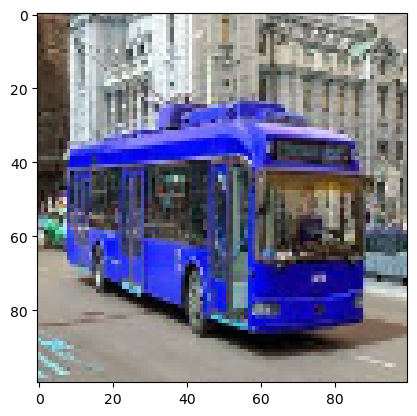

In [67]:
img=cv2.imread(r"C:\Users\arunf\Downloads\download.jpg")
img=cv2.resize(img,(100,100))
plt.imshow(img)

In [68]:
img.shape

(100, 100, 3)

In [69]:
img=img.reshape(1,100,100,3)

In [70]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 73ms/step


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [71]:
index=np.argmax(pred)
index

1

In [72]:
for k,v in pic_class.items():
    if v==index:
        print('prediction:', k)

prediction: bus


**MODEL SAVING**

In [73]:
model.save('vehicles.h5')